In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.read_csv() is used to read the csv file(data set)

In [48]:
df=pd.read_csv('ai4i2020.csv')

EXPLORATORY DATA ANALYSIS EDA

df.head() displays first 5 rows of the dataset

In [49]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


df.info() about null? count? datatype?

dimensions

In [50]:
df.shape

(10000, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

df.describe() gives basic statistics

In [52]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [53]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [54]:
df['Type'].nunique()

3

In [55]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Check for duplicates in the dataset

In [56]:
duplicates=df.duplicated()
no_of_duplicates=duplicates.sum()
print(f"Number of duplicates in the dataset:{no_of_duplicates}")
if(no_of_duplicates>0):
    print("\nDuplicate entry:",df[duplicates])

Number of duplicates in the dataset:0


(1)First we need to transform some columns by ordinal encoding/ label encoding

(2)There are no missing values

(3)Type Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here
(4)The target variable here is Target only, i.e. to predict failure or not

(5)Notice that, there are two output target variables Target and Failure Type
So prediect here multiclass Failure Type Variable

(6)This is a classification problem

In [57]:
df[df['Machine failure']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


Let's represent it in histogram

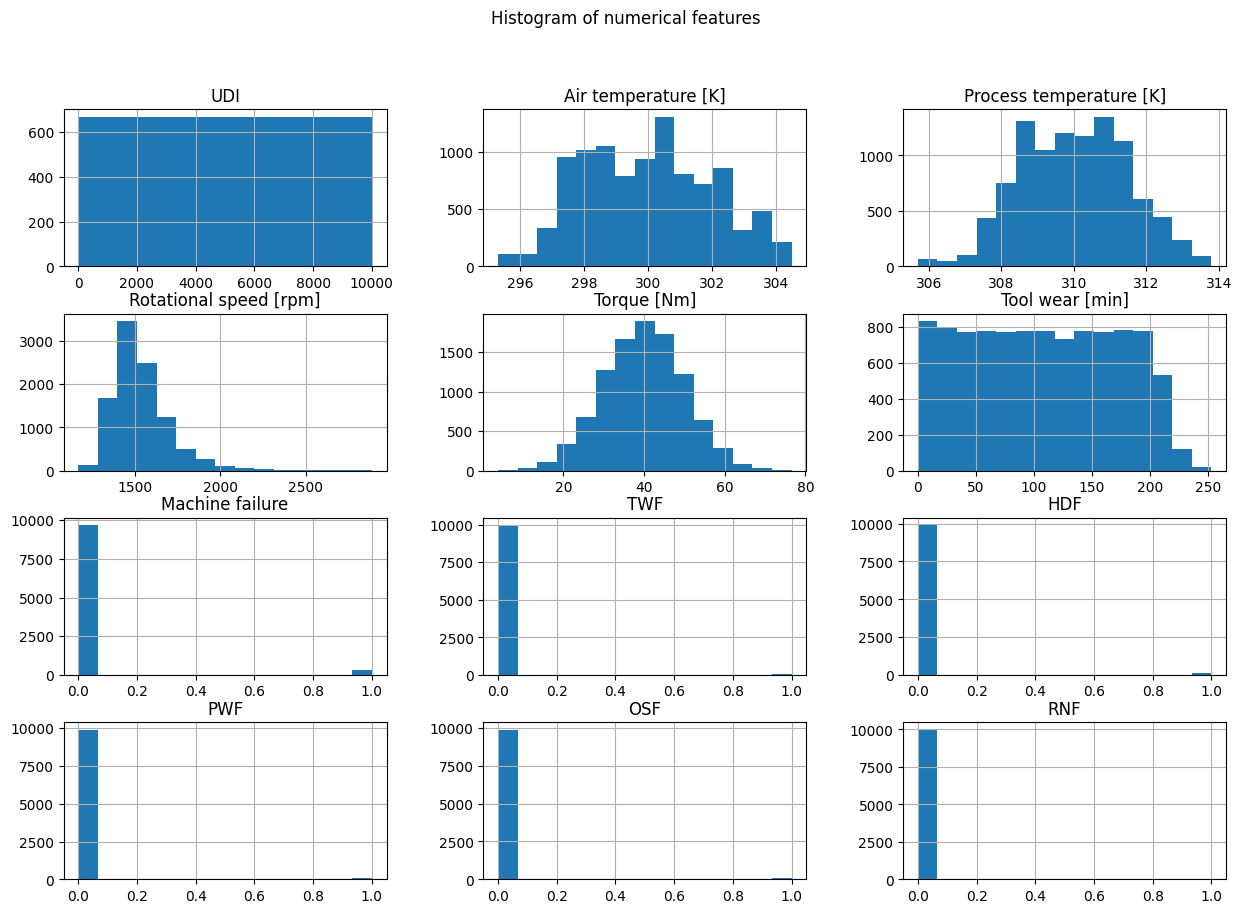

In [58]:
df.hist(bins=15,figsize=(15,10))
plt.suptitle("Histogram of numerical features")
plt.show()

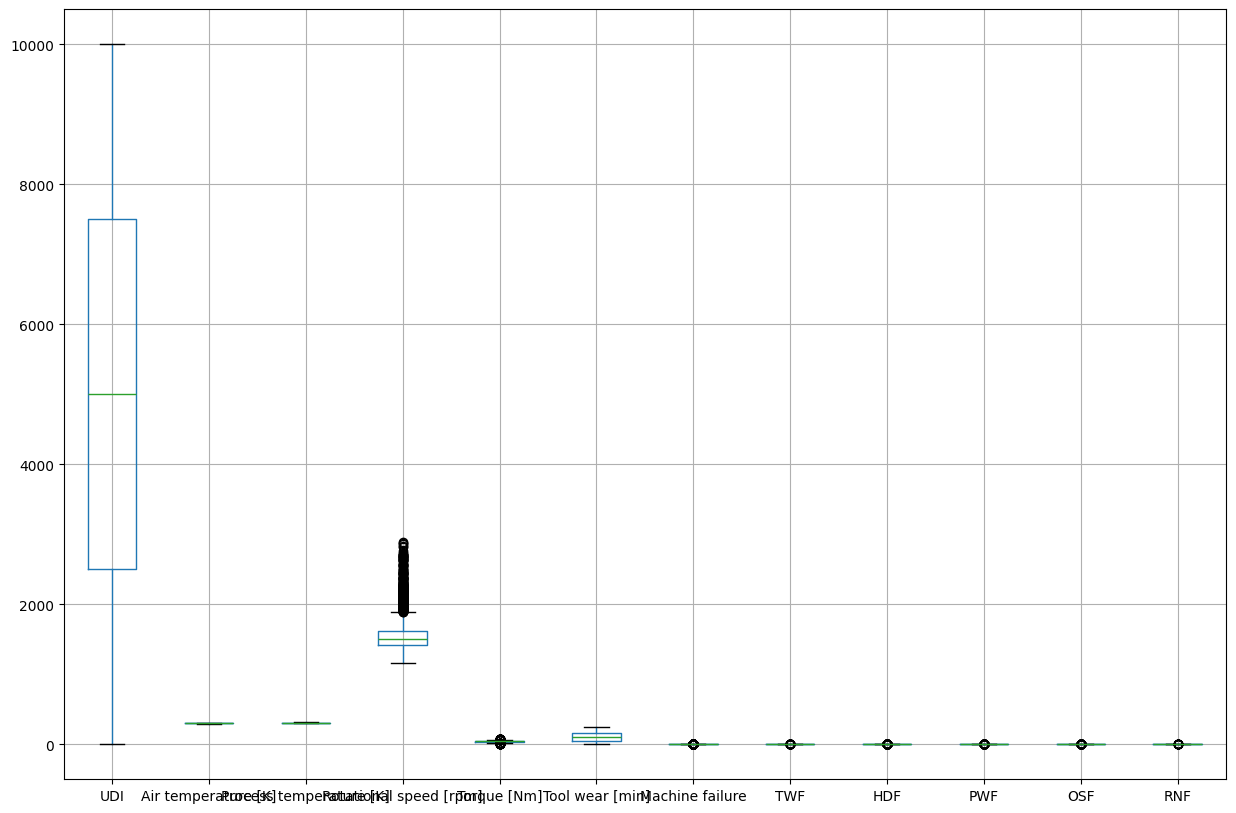

In [59]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

The correlation heatmap helps us understand how different features relate to each other and to the target variable (Machine failure)

Multicollinearity (Highly Correlated Features)

Features that are strongly correlated (close to 1 or -1) provide redundant information, which can affect model performance.
We should avoid using highly correlated features together in the model.
Example: If TWF (Tool Wear Failure) and Machine Failure have a high correlation, including both may not add much value.
✅ Correlation with the Target Variable (Machine Failure)

The most relevant features for predicting machine failure are:
TWF (Tool Wear Failure)
HDF (Heat Dissipation Failure)
PWF (Power Failure)
OSF (Overstrain Failure)
RNF (Random Failure)
These features are direct indicators of failure types, meaning they are strong predictors and must be included in the model.

✅ Weakly Correlated Features

Some features may have little to no correlation with machine failure.
Example: UDI (Unique Device Identifier) is likely to have a correlation close to 0, meaning it does not impact failure and should be removed.

In [69]:
# Check data types of each column
print(df.dtypes)

# Find non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")


UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
Non-numeric columns: ['Product ID', 'Type']


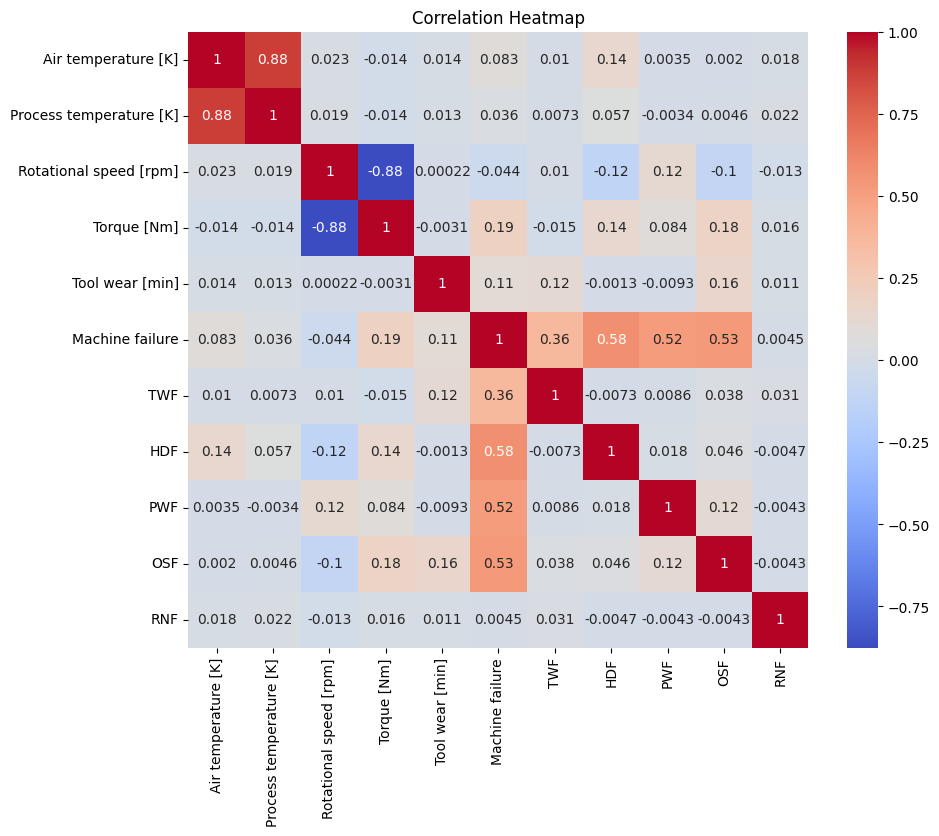

In [ ]:
# Compute correlation matrix
#data = data.drop(columns=['UDI'])  # Replace 'UDI' with the actual column name

#correlation_matrix = df.corr()
dff=df.drop(columns=['UDI','Product ID','Type'])
correlation_matrix=dff.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Selecting Features X and target y

In [63]:
X = df.drop(columns=['Machine failure', 'Product ID', 'UDI'])
y = df['Machine failure']

Remove Unnecessary Columns
We need to drop the following columns:

"Product ID" (not useful for prediction)
"UDI" (Unique identifier, irrelevant for ML)
"Machine failure" (because it is our target y)

In [64]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


✅ Ensures we keep only useful features for training.

In [65]:
print("Remaining features:", X.columns.tolist())
print("Target distribution:\n", y.value_counts())

Remaining features: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Target distribution:
 Machine failure
0    9661
1     339
Name: count, dtype: int64


Handle Class Imbalance with Oversampling
Since "Machine failure" (our target) is highly imbalanced, we use RandomOverSampler to balance it.
✅ This ensures that both failure (1) and non-failure (0) cases are balanced.
✅ Prevents overfitting towards majority class (0).

Oversampling generates more failure samples to balance the classes and prevent the model from always predicting 0 (no failure).

In [66]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check new class distribution
print("New class distribution:\n", pd.Series(y_resampled).value_counts())

New class distribution:
 Machine failure
0    9661
1    9661
Name: count, dtype: int64


📌 Step 3: Reshape Data for Model Training (if needed)
If using deep learning models (like LSTMs or CNNs), we need to reshape the dataset into [samples, time steps, features].
✅ For traditional ML models (Random Forest, SVM, etc.), reshaping is NOT needed.
✅ For Deep Learning (LSTMs/CNNs), reshaping helps models process sequences properly.

In [67]:
# Convert X_resampled to NumPy array
X_resampled_array = X_resampled.values

# Reshape to (samples, time steps, features) → time steps = 1 for static data
X_resampled_reshaped = X_resampled_array.reshape((X_resampled_array.shape[0], 1, X_resampled_array.shape[1]))

print("Reshaped data shape:", X_resampled_reshaped.shape)

Reshaped data shape: (19322, 1, 11)


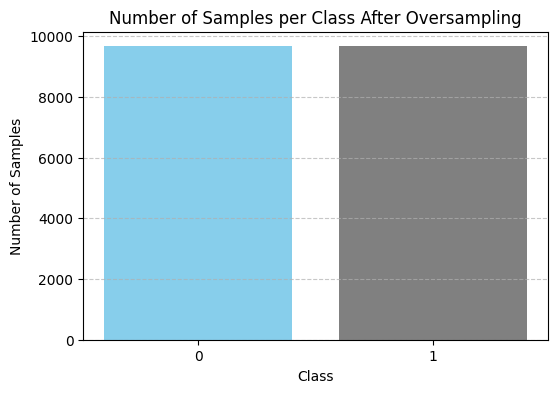

In [68]:
# Ensure y_resampled is a Pandas Series for compatibility
y_resampled = pd.Series(y_resampled)  

# Compute class distribution
counts = y_resampled.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(6, 4))  # Adjust figure size
plt.bar(counts.index, counts.values, tick_label=counts.index, color=['skyblue', 'gray'])
plt.title('Number of Samples per Class After Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0, 1])  # Ensure correct labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

✅ Need: We split the data into:

Training set (80%) → Used to train the LSTM model.
Testing set (20%) → Used to evaluate performance.
💡 Ensures the model is tested on unseen data.

In [74]:
from sklearn.model_selection import train_test_split

# Splitting into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_reshaped, y_resampled, test_size=0.2, random_state=42)


OIIIII Done upto thissss

In [ ]:
X=df.iloc[:,2:8]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train.shape

(8000,)

This code is performing Ordinal Encoding on the Type column in both training (X_train) and testing (X_test) datasets.

In [ ]:
df['Type']

0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: Type, Length: 10000, dtype: object

In [ ]:
df['Type'].nunique()

3

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

Fitting the Encoder on Training Data (X_train)
Learns how to map the categories (L, M, H) to numbers (0, 1, 2).
The model should learn encoding only from training data to avoid data leakage

Converts Type values (L, M, H) into numbers (0, 1, 2).
Uses .astype(int) to ensure the values are stored as integers (not floating-point numbers).

In [ ]:
oe=OrdinalEncoder(categories=[['L','M','H']])
oe.fit(X_train[['Type']])
X_train['Type']=oe.transform(X_train[['Type']]).astype(int)

Applies the same transformation learned from training data to the test data.
Ensures consistency in the data format.
🚨 Why don’t we fit again on X_test?

If we fit again, the encoder may learn a different mapping, leading to inconsistencies

In [ ]:
X_test['Type']=oe.transform(X_test[['Type']]).astype(int)

In [ ]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9254,0,298.3,309.1,1616,31.1,195
1561,0,298.2,308.4,1388,53.8,137
1670,0,298.2,307.8,1528,31.1,194
6087,1,300.9,310.8,1599,33.0,7
6669,0,301.4,310.5,1571,33.9,208


In [ ]:
df['Type']

0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: Type, Length: 10000, dtype: object

In [ ]:
X_train['Type']

9254    0
1561    0
1670    0
6087    1
6669    0
       ..
5734    0
5191    0
5390    2
860     2
7270    0
Name: Type, Length: 8000, dtype: int64

Creates a list of failure categories.
Uses a dictionary comprehension to map each category to a unique number:
Failure Type	Encoded Value
No Failure	                0
Heat Dissipation Failure	1
Power Failure	            2
Overstrain Failure	        3
Tool Wear Failure	        4
Random Failures	            5
This dictionary (custom_encoder) is used for manual encoding of y_train and y_test.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 
              'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder={cat:i for i,cat in enumerate(categories)}
y_train_encoded=[custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le=LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 98.24 %
Model Accuracy Score : 97.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.57      0.27      0.36        15
           2       0.83      0.75      0.79        20
           3       0.80      0.62      0.70        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.53      0.44      0.47      2000
weighted avg       0.97      0.98      0.97      2000

--------------------------------------------------------


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 97.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.87      0.87      0.87        15
           2       0.68      0.85      0.76        20
           3       0.57      0.62      0.59        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.52      0.55      0.53      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.1 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.91      0.67      0.77        15
           2       0.79      0.75      0.77        20
           3       0.80      0.62      0.70        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.58      0.50      0.54      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.58 %
Model Accuracy Score : 96.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        15
           2       0.75      0.15      0.25        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.97      0.95      2000

--------------------------------------------------------


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest is having 99.99% acc and 98% prec. So lets use that here

In [ ]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))

In [ ]:
import joblib

# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'model.joblib')

['model.joblib']

In [ ]:
columns = df.columns.tolist()
columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [ ]:
# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Save the trained model
joblib.dump(random_forest, 'model.joblib')
print("Model trained and saved successfully!")

Model trained and saved successfully!
